In [17]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

Using the latest cached version of the dataset since lukebarousse/data_jobs couldn't be found on the Hugging Face Hub
Found the latest cached dataset configuration 'default' at C:\Users\aungh\.cache\huggingface\datasets\lukebarousse___data_jobs\default\0.0.0\1d815e9ce232eb27db11939c44eb048fe6d2e9ab (last modified on Sat Mar  8 12:48:59 2025).


In [18]:
df.sample(5)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
372376,Business Analyst,Engenheiro de Dados SR,"São Paulo, State of São Paulo, Brazil",via Linkedin,Full-time,False,Brazil,2023-06-21 18:16:27,True,False,Brazil,None,NaN,NaN,GRACE CONSULTING - TECNOLOGIA E PESSOAS LTDA,None,None
81077,Senior Data Analyst,"Senior Data Analyst, Data Management","Springfield, IL",via Trabajo.org,Full-time,False,"Illinois, United States",2023-10-25 00:02:28,False,False,United States,None,NaN,NaN,ICON Strategic Solutions,['tableau'],{'analyst_tools': ['tableau']}
514502,Senior Data Engineer,Senior Data Engineer (GCP),"London, UK",via Totaljobs,Full-time,False,United Kingdom,2023-01-02 11:27:02,True,False,United Kingdom,None,NaN,NaN,Method-Resourcing,"['python', 'sql', 'gcp', 'bigquery', 'git']","{'cloud': ['gcp', 'bigquery'], 'other': ['git'..."
380570,Senior Data Engineer,Senior Data Engineer,"Amsterdam, Netherlands",via LifeworQ,Full-time,False,Netherlands,2023-12-14 18:21:32,True,False,Netherlands,None,NaN,NaN,Cognizant,None,None
723423,Data Scientist,Data Scientist,None,via LinkedIn,Full-time,False,"New York, United States",2023-12-04 21:02:12,False,False,United States,None,NaN,NaN,Codex Recruitment,"['python', 'aws', 'tensorflow', 'pytorch', 'ex...","{'analyst_tools': ['excel'], 'cloud': ['aws'],..."


In [22]:
df = df.drop(labels='salary_hour_avg',axis=1,inplace=False)

In [23]:
df_UK_DA = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United Kingdom')].copy()
df_UK_DA.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,company_name,job_skills,job_type_skills
74,Data Analyst,Data Entry/Economic Data Analyst,"Worcester, UK",via BeBee,Full-time,False,United Kingdom,2023-11-01 13:11:18,False,False,United Kingdom,None,NaN,ttgTalentSolutions,"['sql', 'r', 'python', 'tableau', 'power bi']","{'analyst_tools': ['tableau', 'power bi'], 'pr..."
97,Data Analyst,"Systems & Data Analyst - Exploitation, Missing...",United Kingdom,via Totaljobs,Full-time and Contractor,False,United Kingdom,2023-12-04 13:14:01,True,False,United Kingdom,None,NaN,Solihull Metropolitan Borough Council,None,None
170,Data Analyst,Projects & Solutions Data Analyst (UK Pensions),"Birmingham, UK",via LinkedIn,Full-time,False,United Kingdom,2023-01-04 13:35:45,False,False,United Kingdom,None,NaN,Aon,"['sql', 'excel']","{'analyst_tools': ['excel'], 'programming': ['..."
206,Data Analyst,Business Intelligence / Data Analyst,United Kingdom,via SonicJobs,Full-time,False,United Kingdom,2023-02-16 13:17:48,False,False,United Kingdom,None,NaN,Michael Page Technology,['tableau'],{'analyst_tools': ['tableau']}
218,Data Analyst,Data and Strategy Analyst | Customer Success,United Kingdom,via SimplyHired,Full-time,False,United Kingdom,2023-09-01 13:35:06,True,False,United Kingdom,None,NaN,DeepL SE,['sql'],{'programming': ['sql']}


In [40]:
import matplotlib.ticker as ticker

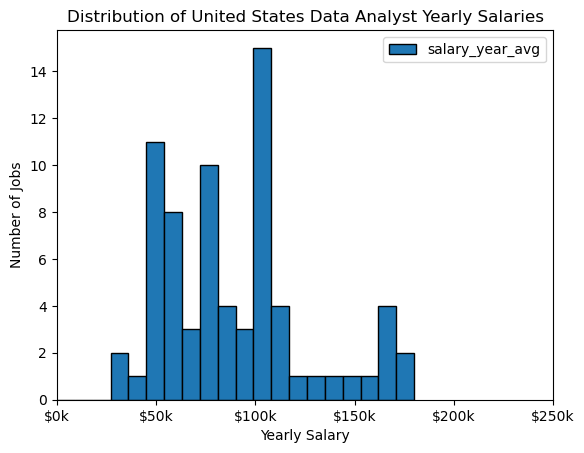

In [41]:
df_UK_DA.plot(kind='hist',bins=20,edgecolor='black')
plt.xlim(0, 250000)

# Function to format the salary
def format_salary(x, pos):
    return f'${int(x/1000)}k'

# Apply the formatter to the x-axis
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(format_salary))

plt.title('Distribution of United States Data Analyst Yearly Salaries')
plt.xlabel('Yearly Salary')
plt.ylabel('Number of Jobs')
plt.show()